In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('GlobalLandTemperaturesByState.csv')
df['dt'] = pd.to_datetime(df['dt'])
df

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [4]:
df1=df.drop(columns = ['AverageTemperatureUncertainty','Country'])
df1

,dt,AverageTemperature,State
0,1855-05-01,25.544,Acre
1,1855-06-01,24.228,Acre
2,1855-07-01,24.371,Acre
3,1855-08-01,25.427,Acre
4,1855-09-01,25.675,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


In [5]:
df2=df1.loc[df1['dt']>='2000-01-01']
df2

,dt,AverageTemperature,State
1736,2000-01-01,25.934,Acre
1737,2000-02-01,26.102,Acre
1738,2000-03-01,26.107,Acre
1739,2000-04-01,25.952,Acre
1740,2000-05-01,25.832,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


In [6]:
df3=df2.loc[(df2['State']=='Wyoming') | (df2['State']=='Nebraska') | (df2['State']=='South Dakota')]
df3

,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [8]:
df4 = df3.drop(columns='State').groupby('dt', as_index=False).mean()
df4

,dt,AverageTemperature
0,2000-01-01,-4.072000
1,2000-02-01,-0.205000
2,2000-03-01,3.642667
3,2000-04-01,7.609667
4,2000-05-01,14.255000
...,...,...
160,2013-05-01,13.196000
161,2013-06-01,18.783667
162,2013-07-01,22.110333
163,2013-08-01,21.890000


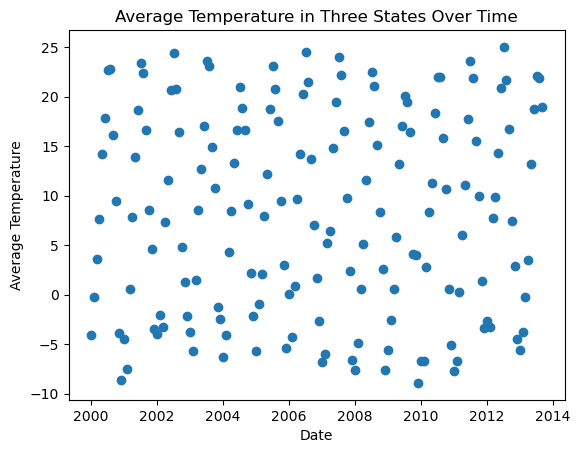

In [10]:
x = df4['dt']
y = df4['AverageTemperature']
fig, ax = plt.subplots()
ax.set_xlabel('Date')
ax.set_ylabel('Average Temperature')
ax.set_title('Average Temperature in Three States Over Time')
ax.scatter(x,y)

In [12]:
def dateToNum(dt):
    return (dt - np.datetime64('2000-01-01')).days

In [13]:
df4['dt'] = df4['dt'].apply(dateToNum)
df4

,dt,AverageTemperature
0,0,-4.072000
1,31,-0.205000
2,60,3.642667
3,91,7.609667
4,121,14.255000
...,...,...
160,4869,13.196000
161,4900,18.783667
162,4930,22.110333
163,4961,21.890000


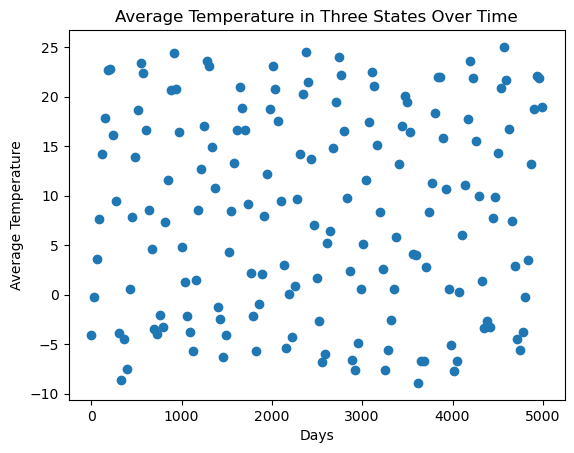

In [14]:
x = df4['dt']
y = df4['AverageTemperature']
fig, ax = plt.subplots()
ax.set_xlabel('Days')
ax.set_ylabel('Average Temperature')
ax.set_title('Average Temperature in Three States Over Time')
ax.scatter(x,y)

In [27]:
def func(x, a, b, c, d):
    return a*np.cos(x*2*np.pi/b+c)+d

pars = np.array([15, 365, np.pi*0.9, 8])

In [28]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, df4['dt'], df4['AverageTemperature'], bounds=([10,360,np.pi*0.7, 6],[20,370,np.pi*1.1,10]))

In [29]:
popt

array([ 13.91539272, 365.47013539,   3.11516177,   8.17035678])

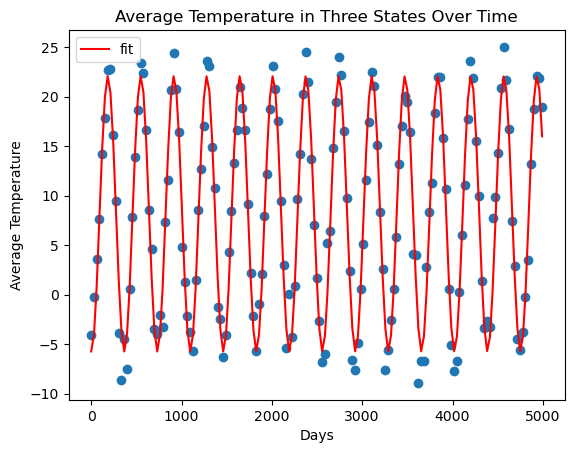

In [30]:
x = df4['dt']
y = df4['AverageTemperature']
fig, ax = plt.subplots()
ax.set_xlabel('Days')
ax.set_ylabel('Average Temperature')
ax.set_title('Average Temperature in Three States Over Time')
ax.plot(x, func(x, *popt), 'r-', label='fit')
ax.legend()
ax.scatter(x,y)

In [31]:
a,b,c,d = popt
a_err = np.sqrt(pcov[0,0])
b_err = np.sqrt(pcov[1,1])
c_err = np.sqrt(pcov[2,2])
d_err = np.sqrt(pcov[3,3])

In [32]:
print('a={}±{}'.format(a,a_err))
print('b={}±{}'.format(b,b_err))
print('c={}±{}'.format(c,c_err))
print('d={}±{}'.format(d,d_err))

a=13.915392719109429±0.22604937533298064
b=365.4701353861449±0.24113460209442616
c=3.1151617739763187±0.03267810487168099
d=8.170356783410162±0.16031164245699892


In [33]:
print('func(x)={}*cos(2πx/{}+{})+{}'.format(a,b,c,d))

func(x)=13.915392719109429*cos(2πx/365.4701353861449+3.1151617739763187)+8.170356783410162
